# Detector de mensajes spam
---



Partiendo de una lista de mensajes que están clasificados como spam o no, utilizaremos **NLP** con el objetivo de predecir si un mensaje es spam o no.

## Importar las librerías de Python

En primer lugar, se importan las librerias necesarias de Python para el tratamiento de los datos.

In [0]:
import numpy as np
import pandas as pd 

En segundo lugar, se realiza la lectura del fichero en el que se encuentra el conjunto de datos, la información del fichero .csv ahora se copia a una variable o instancia **DataFrame** de pandas utilizando el método **read_csv()**.

In [2]:
df_mensajespam = pd.read_csv('spam_text_message.csv')
df_mensajespam

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## Validación de los datos del dataset

Se realiza la validación de los tipos de datos y si hay campos nulos.

In [3]:
df_mensajespam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
Category    5572 non-null object
Message     5572 non-null object
dtypes: object(2)
memory usage: 87.2+ KB


## Análisis del dataset

Se visualizan la cantidad de registros por categoria de salida, los mensajes únicos y los mensajes que mas se repiten.

In [4]:
df_mensajespam.groupby('Category').describe()

Message                                                               
           count unique                                                top freq
Category                                                                       
ham         4825   4516                             Sorry, I'll call later   30
spam         747    641  Please call our customer service representativ...    4

Añadimos una nueva columna con la longitud del mensaje en el DataFrame.

In [5]:
df_mensajespam['Length'] = df_mensajespam['Message'].apply(len)
df_mensajespam

,Category,Message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


## Visualización de los datos

Diagrama de tarta para visualizar los porcentajes de mensajes de spam y no spam que hay en el dataset. En este caso hay un 13'4% de mensajes spam y un 86'6% de mensajes no spam.

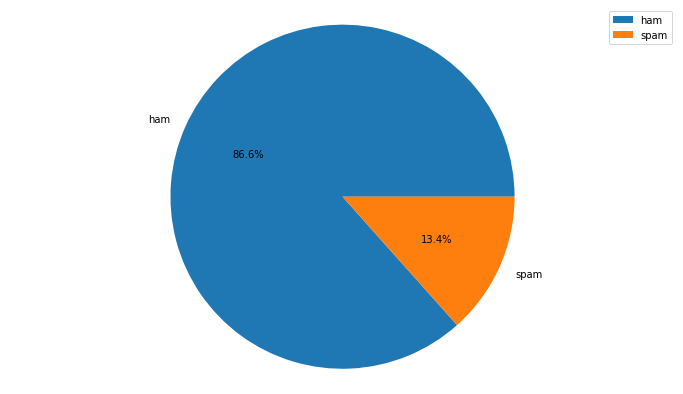

In [6]:
import matplotlib.pyplot as plt
fig1, grafica = plt.subplots(figsize=(12,7))
grafica.pie(df_mensajespam['Category'].value_counts(), labels=['ham','spam'], autopct='%1.1f%%')
grafica.axis('equal')  
plt.legend()
plt.show()

Histograma para visualizar la longitud de los mensajes del dataset.

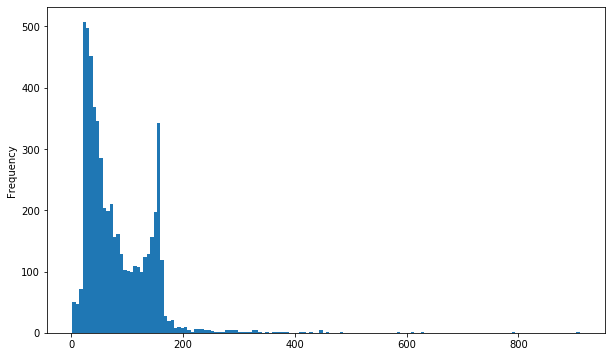

In [7]:
plt.figure(figsize=(10,6))
df_mensajespam['Length'].plot.hist(bins = 150)

Estadísticas generales asociadas a la longitud de los mensajes.

In [8]:
df_mensajespam['Length'].describe()

count    5572.000000
mean       80.368988
std        59.926946
min         2.000000
25%        35.750000
50%        61.000000
75%       122.000000
max       910.000000
Name: Length, dtype: float64

## Limpieza del texto

Se importan las librerías necesarias para trabajar con un corpus: **string**, **nltk** y **stopwords**.

In [9]:
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Se define una función **procesar_mensaje()** para:
* Eliminar signos de puntuación
* Eliminar palabras sin significado (stopwords) como artículos, preposiciones, pronombres.
* Retornar una lista con el texto limpio

In [0]:
def procesar_mensaje(mensaje):
    resultado = [caracter for caracter in mensaje if caracter not in string.punctuation]
    resultado = ''.join(resultado)
    return [palabra for palabra in resultado.split() if palabra.lower() not in stopwords.words('english')]

Se aplica la función ***procesar_mensaje()*** a la columna de mensajes del dataset

In [11]:
df_mensajespam['Message'].apply(procesar_mensaje)

0       [Go, jurong, point, crazy, Available, bugis, n...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3           [U, dun, say, early, hor, U, c, already, say]
4       [Nah, dont, think, goes, usf, lives, around, t...
                              ...                        
5567    [2nd, time, tried, 2, contact, u, U, £750, Pou...
5568                   [ü, b, going, esplanade, fr, home]
5569                     [Pity, mood, Soany, suggestions]
5570    [guy, bitching, acted, like, id, interested, b...
5571                                   [Rofl, true, name]
Name: Message, Length: 5572, dtype: object

## Vectorización

Actualmente los mensajes están en una lista y se necesita convertir cada uno de esos mensajes en un vector para que los algoritmos puedan generar un modelo.

A continuación vamos a ver un ejemplo de vectorización del primer mensaje de nuestro dataset.


Generamos un modelo creando una instancia de la clase ***CountVectorizer*** de ***sklearn*** y entrenando el modelo con los mensajes de nuestro dataset, utilizando el método ***fit()*** de la instancia.

In [0]:
from sklearn.feature_extraction.text import CountVectorizer 
modeloCV = CountVectorizer(analyzer=procesar_mensaje).fit(df_mensajespam['Message'])

El modelo generado tiene como atributo un determinado vocabulario (***vocabulary_***) que es un diccionario de palabras y códigos. Podemos ver de cuántas palabras se compone el diccionario. 

In [13]:
print(len(modeloCV.vocabulary_))

11422


Visualizamos el primer mensaje de nuestro dataset

In [14]:
mensaje1 = df_mensajespam['Message'][0]
print(mensaje1)

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


Aplicando el método de la instancia ***transform()*** y como parámetro el primer mensaje del dataset, obtenemos el mensaje vectorizado.

In [15]:
m1 = modeloCV.transform([mensaje1])
print(m1)
print(m1.shape)

  (0, 1107)	1
  (0, 1480)	1
  (0, 2058)	1
  (0, 4651)	1
  (0, 5214)	1
  (0, 5215)	1
  (0, 5766)	1
  (0, 6214)	1
  (0, 6903)	1
  (0, 6934)	1
  (0, 7552)	1
  (0, 7665)	1
  (0, 8333)	1
  (0, 8914)	1
  (0, 10962)	1
  (0, 11160)	1
(1, 11422)


Aplicando el método de la instancia ***get_feature_names()*** y como parámetro la clave de la palabra del vocabulario obtenemos la palabra.

In [16]:
print(modeloCV.get_feature_names()[1107])
print(modeloCV.get_feature_names()[1480])
print(modeloCV.get_feature_names()[2058])
print(modeloCV.get_feature_names()[4651])
print(modeloCV.get_feature_names()[5214])
print(modeloCV.get_feature_names()[5215])
print(modeloCV.get_feature_names()[5766])
print(modeloCV.get_feature_names()[6214])
print(modeloCV.get_feature_names()[6903])
print(modeloCV.get_feature_names()[6934])
print(modeloCV.get_feature_names()[7552])
print(modeloCV.get_feature_names()[7665])
print(modeloCV.get_feature_names()[8333])
print(modeloCV.get_feature_names()[8914])
print(modeloCV.get_feature_names()[10962])
print(modeloCV.get_feature_names()[11160])

Available
Cine
Go
amore
buffet
bugis
crazy
e
got
great
jurong
la
n
point
wat
world


Realizando el paso anterior con la lista completa de mensajes podemos contabilizar el porcentaje de elementos no cero hay en la matriz dispersa que se genera entre los mensajes y el vocabulario. 

In [17]:
mensajes_modeloCV = modeloCV.transform(df_mensajespam['Message'])
print('Dimensiones de la matriz dispersa:', mensajes_modeloCV.shape)
print('Números de elementos no cero     :', mensajes_modeloCV.nnz)

Dimensiones de la matriz dispersa: (5572, 11422)
Números de elementos no cero     : 50500


In [18]:
porcentajenocero = (100.0 * mensajes_modeloCV.nnz / (mensajes_modeloCV.shape[0] * mensajes_modeloCV.shape[1]))
print('Porcentaje de elementos no cero: {}%'.format(round(porcentajenocero, 2)))

Porcentaje de elementos no cero: 0.08%


## TF-IDF

Normalizamos las palabras del vocabulario con TF-IDF

In [19]:
from sklearn.feature_extraction.text import TfidfTransformer
modeloTFIDF = TfidfTransformer().fit(mensajes_modeloCV)
tfidf1 = modeloTFIDF.transform(mensajes_modeloCV)
print(tfidf1)

  (0, 11160)	0.23026685592418913
  (0, 10962)	0.19073428545061483
  (0, 8914)	0.24704652376837993
  (0, 8333)	0.17046869292195632
  (0, 7665)	0.26403384065473806
  (0, 7552)	0.31253856260694546
  (0, 6934)	0.1834692413608692
  (0, 6903)	0.15158474664662352
  (0, 6214)	0.18915557732842803
  (0, 5766)	0.24984711892976424
  (0, 5215)	0.26870593862526665
  (0, 5214)	0.29835184088197164
  (0, 4651)	0.31253856260694546
  (0, 2058)	0.24203960256420656
  (0, 1480)	0.31253856260694546
  (0, 1107)	0.2882862016308418
  (1, 11069)	0.40059731892909933
  (1, 10695)	0.20657545787061052
  (1, 8587)	0.5043175634668231
  (1, 7698)	0.3767229062690876
  (1, 3062)	0.2911862458354422
  (1, 2449)	0.5619631532224204
  (2, 11120)	0.19104387220509106
  (2, 11081)	0.15898145347176754
  (2, 10683)	0.13995540820792943
  :	:
  (5568, 6879)	0.31367469776242124
  (5568, 6688)	0.47781076401785183
  (5568, 6351)	0.5575721048646767
  (5568, 4878)	0.3853122086093004
  (5569, 10196)	0.520467167163554
  (5569, 8249)	0.4328

In [20]:
print(tfidf1.shape)

(5572, 11422)


### Random Forest

Con un algoritmo de Random Forest de clasificación se puede predecir la categoria de un determinado mensaje.

In [21]:
from sklearn.ensemble import RandomForestClassifier
modeloRFC = RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=0)
modeloRFC.fit(tfidf1, df_mensajespam['Category'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [22]:
print('Categoria primer mensaje real:      ', df_mensajespam.Category[0])
print('Categoria primer mensaje predicción:', modeloRFC.predict(tfidf1)[0])

Categoria primer mensaje real:       ham
Categoria primer mensaje predicción: ham


In [23]:
pred_RFC = modeloRFC.predict(mensajes_modeloCV)
print(pred_RFC)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [24]:
from sklearn.metrics import classification_report
print (classification_report(df_mensajespam['Category'], pred_RFC))

              precision    recall  f1-score   support

         ham       0.99      1.00      1.00      4825
        spam       1.00      0.96      0.98       747

    accuracy                           0.99      5572
   macro avg       1.00      0.98      0.99      5572
weighted avg       0.99      0.99      0.99      5572



In [25]:
from sklearn import metrics
print("Precisón modelo RFC:",metrics.accuracy_score(df_mensajespam['Category'], pred_RFC))

Precisón modelo RFC: 0.9940775305096913


## Pipeline

Finalmente para generar el modelo predictivo vamos a combinar los 3 algoritmos anteriores (Vectorización, TF-IDF y Random Forest) en un algoritmo **Pipeline** que generará nuestro modelo predictivo.

### División del dataset para entrenamiento y pruebas

In [26]:
from sklearn.model_selection import train_test_split
mensajes_train, mensajes_test, categorias_train, categorias_test = train_test_split(df_mensajespam['Message'], df_mensajespam['Category'], test_size=0.2)
print("Número observaciones entrenamiento:", len(mensajes_train))
print("Número observaciones pruebas:      ", len(mensajes_test))

Número observaciones entrenamiento: 4457
Número observaciones pruebas:       1115


### Generación del modelo

In [0]:
from sklearn.pipeline import Pipeline

modeloPL = Pipeline([
    ('pcv', CountVectorizer(analyzer=procesar_mensaje)),
    ('ptfidf', TfidfTransformer()),
    ('prfc', RandomForestClassifier()),
])

### Entrenamiento del modelo

In [28]:
modeloPL.fit(mensajes_train, categorias_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
         steps=[('pcv',
                 CountVectorizer(analyzer=<function procesar_mensaje at 0x7f4554519c80>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                              

### Prueba del modelo

In [0]:
categorias_pred = modeloPL.predict(mensajes_test)

### Matriz de confusión

La **matriz de confusión** permite visualizar las observaciones de todas las combinaciones de las clasificaciones reales y de predicción. Utilizamos la función ***confusion_matrix()*** de la libreria ***sklearn***, comparando los datos de test con los de predicción. y posteriormente se representa de forma gráfica.

Text(0.5, 257.44, 'Categoria pred.')

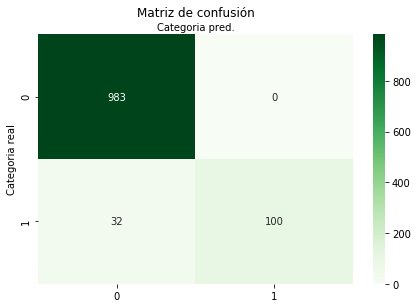

In [30]:
from sklearn.metrics import confusion_matrix,classification_report
mc = confusion_matrix(categorias_test, categorias_pred)
categ_bin=[0,1]
fig, ax = plt.subplots()
ticks = np.arange(len(categ_bin))
plt.xticks(ticks, categ_bin)
plt.yticks(ticks, categ_bin)

import seaborn as sns
sns.heatmap(pd.DataFrame(mc), annot=True, cmap="Greens" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de confusión', y=1.1)
plt.ylabel('Categoria real')
plt.xlabel('Categoria pred.')

### Informe de clasificación

El **informe de clasificación** nos permite visualizar distintos marcadores de precisión del modelo. Utilizamos la función ***classification_report()*** de la libreria ***sklearn***, comparando los datos de test con los de predicción.

In [31]:
print(classification_report(categorias_test, categorias_pred))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       983
        spam       1.00      0.76      0.86       132

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



### Precisión del modelo

Finalmente utilizamos el método ***accuracy_score()*** de la librería ***sklearn*** para medir la precisión del modelo, comparando los datos de test con los de predicción.

In [32]:
from sklearn import metrics
print("Precisión del modelo:", metrics.accuracy_score(categorias_test, categorias_pred))

Precisión del modelo: 0.9713004484304932
